In [38]:
import warnings
import pandas as pd
import random
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

In [19]:
warnings.filterwarnings('ignore', category=UserWarning)

In [35]:
def draw_2_hist(data_1, title_1, data_2, title_2):
    # Визуализируем
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data_1, ax=axes[0], kde=True)
    axes[0].set_title(title_1)
    sns.histplot(data_2, ax=axes[1], kde=True)
    axes[1].set_title(title_2)
    plt.tight_layout()
    plt.show()

In [20]:
# Оригинал – https://habr.com/ru/articles/653363/

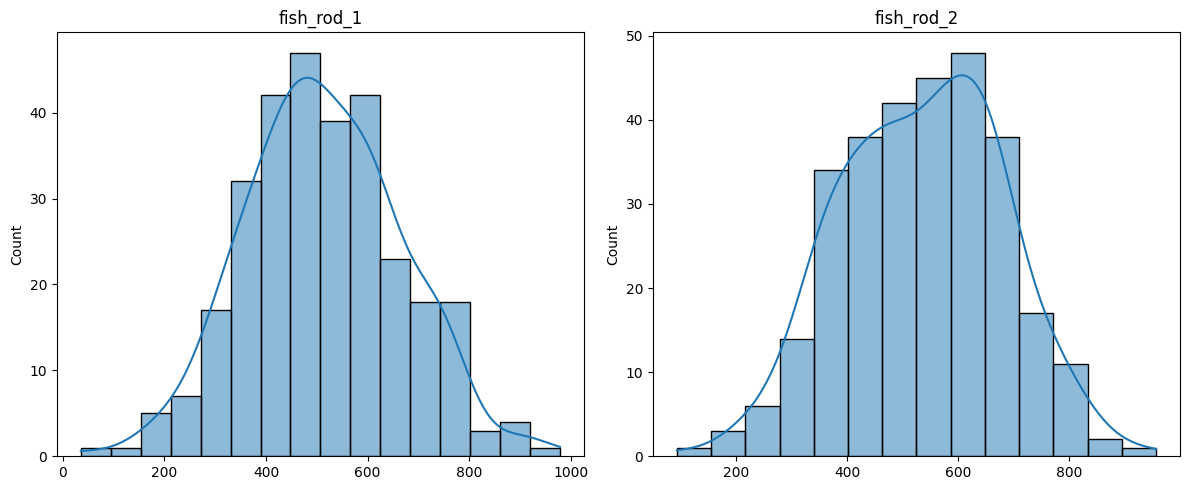

In [36]:
# Формируем две группы 
fish_rod_1 = np.random.normal(loc=500, scale=150, size=300)
fish_rod_2 = np.random.normal(loc=530, scale=150, size=300)

draw_2_hist(data_1=fish_rod_1, title_1="fish_rod_1",
            data_2=fish_rod_2, title_2="fish_rod_2")

## Нормальное распределение
<p align="center"><img src="src/img/001.png", height="500"></p>


- Распределение симметрично относительно своего центра $\mu$.
- Распределение унимодально. То есть имеет только одну моду (вершину). Собственно, вокруг этой вершины оно и симметрично.
- Распределение является функцией плотности. То есть вероятность попасть в интервал (a; b) равняется площади под кривой нормального распределения в интервале (a; b). Важно, что вероятность попасть в интервал $(-\infty; +\infty)$ равняется 100%, то есть площадь под кривой в данном интервале равняется единице.
- Распределение подчиняется вероятностному закону. Взглянув на распределение, мы можем сказать, что в промежутке $(-1\sigma; 1\sigma)$ находится приблизительно 34.1% + 34.1% = 68.2% наблюдений. Или, другими словами, вероятность случайным образом попасть в данный промежуток 68.2%. Или, с более формальной точки зрения, площадь под кривой нормального распределения в интервале $(-1\sigma; 1\sigma)$ равняется 0.682.
- Распределение задается функцией Гаусса
- Мы можем привести любое нормальное распределение к стандартному виду благодаря z-оценке.

## Центральная предельная теорема
Центральная предельная теорема гласит, что сумма большого количества независимых случайных величин имеет распределение близкое к нормальному.

Давайте разбираться, у нас есть выборка размера $n = 300$ рыб, пойманных на первую удочку& Проведем эксперимент:
- Будем многократно выбирать 300 рыб случайным образом. Так, чтобы одна и та же рыба могла попасть в новую выборку несколько раз.
- После этого считаем средний вес рыбы (независимая случайная величина).
- Повторяем пункт 1 и 2 много-много-много раз и записываем каждый раз значения средних.
- Распределение средних должно стремиться к нормальному с увеличением количества повторений.

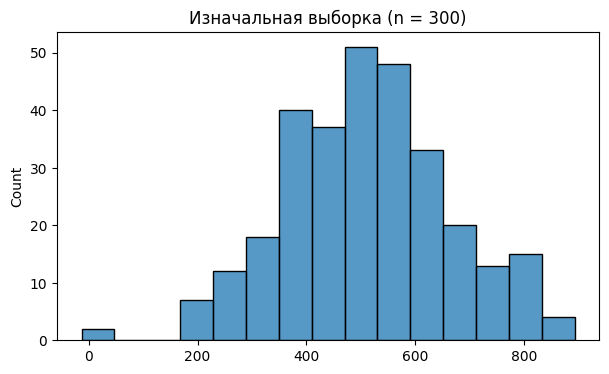

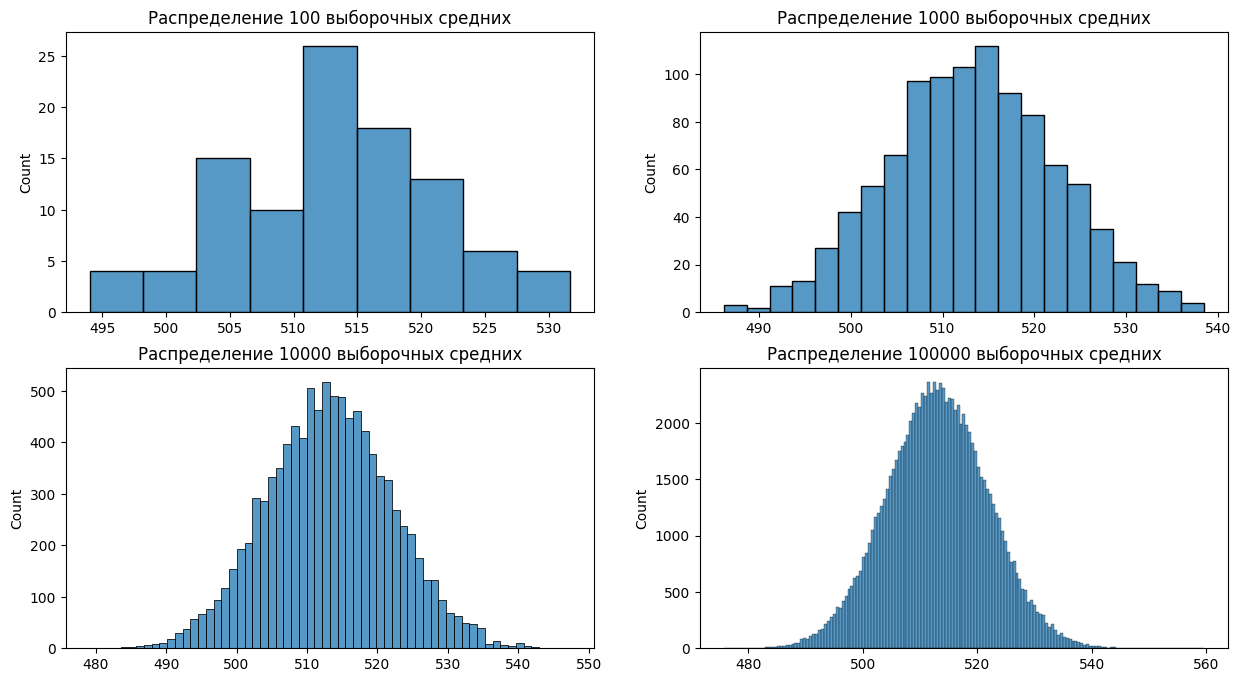

In [28]:
fig, axes = plt.subplots(figsize=(7, 4))
sns.histplot(data=fish_rod_1, ax=axes)
axes.set_title('Изначальная выборка (n = 300)', size=12);

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
avg = [[0, 0], [0, 0]]
size = [[100, 1000], [10000, 100000]]
for i in range(2):
    for j in range(2):
        avg[i][j] = [np.mean(random.choices(fish_rod_1, k=300)) for i in range(size[i][j])]
        sns.histplot(data=avg[i][j], ax=axes[i][j])
        axes[i][j].set_title('Распределение {:d} выборочных средних'.format(size[i][j]), size=12)

fig.show();

Важно отметить, что чем больше $n$(размер исходной выборки), тем ближе наше среднее к реальному среднему генеральной совокупности.  Поэтому, пока мы не знаем вес всех жителей пруда, мы не можем быть уверены, что в нашем улове среднее и стандартное отклонение совпадают с теми же значениями по всем рыбам пруда. Следовательно, нужно внести некую поправку, меру уверенности в наших данных. Эта мера уверенности есть. 

Среднеквадратичное отклонение равняется стандартному отклонению выборки, деленному на корень из числа элементов выборки. $se=\frac{\sigma_{x}}{\sqrt{n}}$

## Z-score
Z-оценка представляет собой преобразование данных в стандартную Z-шкалу со средним $\mu_z = 0$ и $\sigma_z$ = 1 по следующей формуле: $z_{i}=\frac{x_{i}-\bar{x}}{\sigma_{x}}$

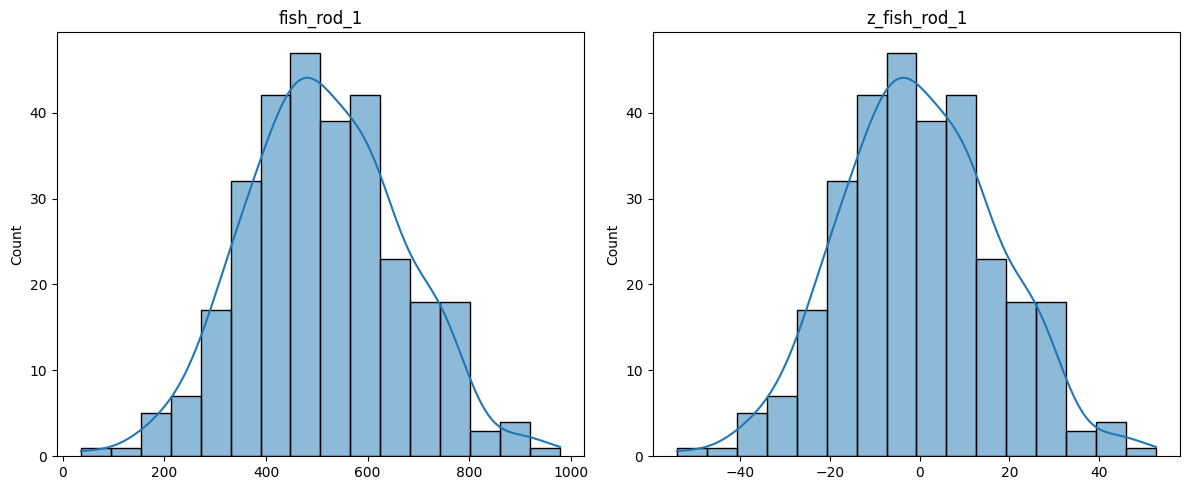

In [37]:
mu_z = fish_rod_1.mean()
se_z = fish_rod_1.std() / sqrt(len(fish_rod_1))
z_fish_rod_1 = [(x - mu_z) / se_z for x in fish_rod_1]

draw_2_hist(data_1=fish_rod_1, title_1="fish_rod_1",
            data_2=z_fish_rod_1, title_2="z_fish_rod_1")

Мы видим два абсолютно одинаковых графика с виду, но обратите внимание на ось абсцисс. И теперь по оси абсцисс не единицы веса, а единицы стандартного отклонения. Таким образом любое нормальное распределение можно стандартизировать и привести к единому виду с $\mu_z = 0$ и $\sigma_z = 1$. И как следствие из этого, мы можем сравнивать средние двух признаков, если они нормально распределены, потому что их можно привести к единому виду благодаря z-score. Данные после преобразования будут исчисляться уже не в рыбках, котиках и морковках, а в стандартных отклонениях от среднего.

## Генеральная совокупность и одна рыба
Забудем пока про вторую удочку и представим, что ловят только на одну. То есть мы можем для удобства сделать допущение, что параметры $(\mu = 500 и \sigma = 150)$ являются описанием генеральной совокупности. Запомните это. Поэтому нам не требуется делить наше стандартное отклонение на $\sqrt{n}$.
 
Теперь вопрос, с какой вероятностью поймает рыбу, которая будет тяжелее, чем 530 грамм? Чтобы узнать ответ, опять воспользуемся формулой z-score: $z=\frac{x-\mu}{\sigma}=\frac{530-500}{150}=0.2$

Что мы сейчас получили? Мы посчитали, что значение 530 грамм отклоняется от среднего значения генеральной совокупности (500 грамм) на 0,2 стандартных отклонения.
<p align="center"><img src="src/img/002.png", height="500"></p>

Зная отклонение от среднего генеральной совокупности (__z-score__), мы можем посчитать вероятность поймать рыбу тяжелее 530 грамм. Для этого воспользуемся подходящим инструментом в python, в который уже вшита функция плотности. Он за нас рассчитает площадь под кривой, правее $0.2\sigma$ (то, что закрашено синим на графике). Это и будет значением необходимой нам вероятности.

In [47]:
# Стандартизированное нормальное распределение
norm_rv = stats.norm(loc=0, scale=1)
print(1 - norm_rv.cdf(0.2))

# Или обычное нормальное распределение, как в нашем случае
norm_rv = stats.norm(loc=500, scale=150)
print(1 - norm_rv.cdf(530))

0.420740290560897
0.420740290560897


Обе функции вернут одинаковый ответ: $p = 0.42074$. Это и есть __p-value__, вероятность случайным образом вытащить одну рыбу с весом более 530 грамм. Разница в них только в том, что в первом случае нормальное распределение стандартизировано, а во втором мы работаем с параметрами генеральной совокупности.

## Генеральная совокупность и несколько рыб
С одной рыбой разобрались. А какова вероятность поймать 4, 100 и даже 300 рыб со средним весом 530 грамм? Воспользуемся формулой z-score, но немного ее модернизируем. Как раз сейчас нам и понадобится та самая поправка из центральной предельной теоремы.

<br><div align="center">
$\large{z=\frac{\bar_{x}-\mu}{\frac{\sigma}{\sqrt{n}}}}$
</div>

Где, $\bar{x}$ - среднее значение в выборке,$\mu$ - среднее генеральной совокупности, $\sigma$ - стандартное отклонение в генеральной совокупности, $n$ - кол-во элементов в выборке. Здесь мы вносим поправку в наше стандартное отклонение, так как работаем уже с несколькими элементами.

Практический смысл данной формулы говорит о том, что мы ввели две гипотезы, которые будут конкурировать между собой:
- $H_0:$Нулевая гипотеза говорит о том, что выборка на самом деле принадлежит генеральной совокупности и средние значения выборки и генеральной совокупности равны $(\bar{x} = \mu)$.
- $H_1:$Альтернативная гипотеза говорит об обратном. Выборка не является частным случаем текущей генеральной совокупности и средние, на самом деле, отличаются $(\bar{x} \neq \mu)$.

Чтобы подтвердить или опровергнуть $H_0$ мы и считаем $z-score$ и $p-value$. То есть мы считаем вероятность того, что $\bar{x}$ отличается от $\mu$ на z стандартных отклонений. И если эта вероятность нас устраивает, то мы принимаем нулевую гипотезу, а если нет - отвергаем. Теперь давайте подставим в формулу значения:

<br><div align="center">
$z=\frac{530-500}{\frac{150}{\sqrt{4}}}=\frac{30}{75}=0.4$
</div>

Теперь мы знаем, что среднее по выборке $\bar{x}$ отклоняется от среднего генеральной совокупности $\mu$ на $0.4\sigma$. Давайте теперь посчитаем вероятность такого отклонения

<p align="center"><img src="src/img/003.png", height="500"></p>

In [50]:
# Вероятность поймать 4 рыбы со средним весом 530 грамм мы можем рассчитать все тем же способом, как и для единичного случая. P-value у нас получится равным 0.3446.
norm_rv = stats.norm(loc=0, scale=1)
print(1 - norm_rv.cdf(0.4))

0.3445782583896758


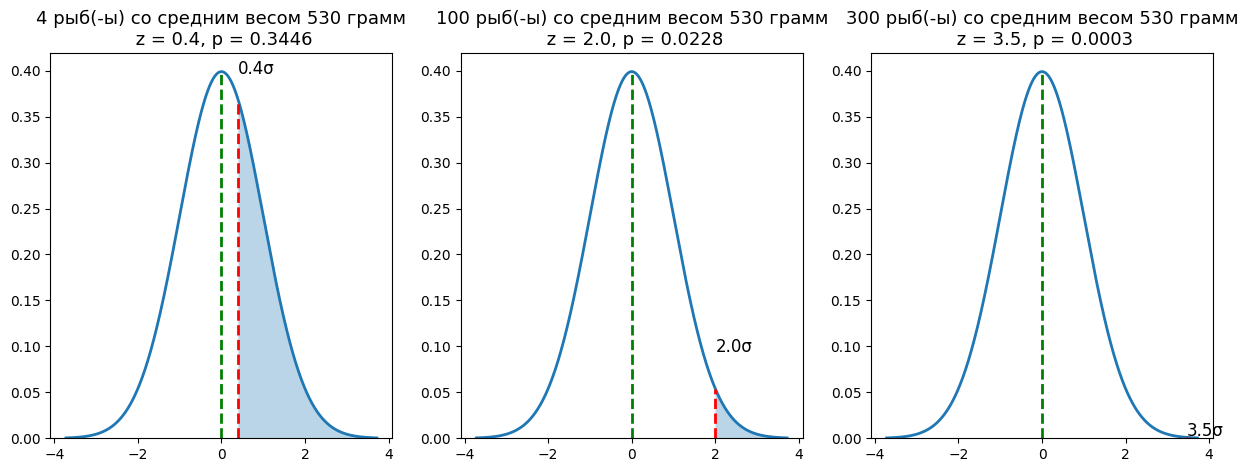

In [52]:
# Чем больше мы хотим поймать рыб со средним весом 530 грамм, тем больше у нас z-score и тем меньше p-value. Давайте посмотрим как это выглядит на практике
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 1000)
norm_rv = stats.norm(loc=0, scale=1)

fish = [4, 100, 300]

for i in range(3):
    z = (530 - 500) / (150 / np.sqrt(fish[i]))
    ax[i].plot(x, norm_rv.pdf(x), lw=2)
    ax[i].vlines(0, 0, norm_rv.pdf(0), color='g', lw=2, linestyles="dashed")
    ax[i].vlines(z, 0, norm_rv.pdf(z), color='r', lw=2, linestyles="dashed")
    ax[i].text(z, norm_rv.pdf(z - 0.3), '{:.1f}σ'.format(z), size=12, ha='left')
    ax[i].fill_between(x, norm_rv.pdf(x), np.zeros(len(x)), alpha=0.3, where=(x > z))
    ax[i].set_title(
        '{:d} рыб(-ы) со средним весом 530 грамм\n z = {:.1f}, p = {:.4f}'.format(fish[i], z, 1 - norm_rv.cdf(z)),
        size=13)
    ax[i].set_ylim(0)

То есть вероятность поймать 100 рыб со средним весом 530 грамм равняется 2.28%, а вероятность поймать 300 рыб равняется 0.03%, что ничтожно мало. И мы можем сделать вывод, что вторая удочка, с новой наживкой отработала лучше. Так как только в 0,03% случаев мы могли ошибиться.

Но помните, что мы сделали допущение, что данные с первой удочки - это генеральная совокупность. А по факту это выборка из генеральной совокупности. Будет ли теперь наш вывод статистически правильным? Нет, мы не учли этот момент. Давайте теперь все учтем и наконец-таки сделаем финальный вывод с точными цифрами!

## Две выборки со множеством рыб
Теперь у нас не генеральная совокупность и выборка, а две выборки из нескольких сотен рыб. То есть, если бы продолжили бы ловить рыбу еще несколько дней, то средние значения и стандартные отклонения могли бы измениться.

Важно, что __z-критерий__ требует знания стандартных отклонений. Поэтому давайте зафиксируемся на том, что мы поймали достаточно много рыб, чтобы утверждать, что $\sigma_1$ и $\sigma_2$ являются такими же, как и в генеральной совокупности (во всем пруду). Иначе нам нужно будет воспользоваться t-критерием Стьюдента.

<p align="center"><img src="src/img/004.png", height="200"></p>

Как мы помним из ЦПТ, нам нужно ввести поправку. И у нас теперь две выборки и поправку необходимо будет учесть два раза.

<br><div align="center">
$\large{z=\frac{\mu_2-\mu_1}{\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_1}{n_2}}}}$
</div>
Практический смысл данной формулы все тот же. Мы принимаем нулевую гипотезу о равенстве средних $H_0: \mu_1 = \mu_2$ при условие высокой вероятности (p-value) данного события, в ином случае отвергаем.

Давайте теперь подставим наши значения и рассчитаем z-score.

<br><div align="center">
$\large{z=\frac{530-500}{\sqrt{\frac{150^2}{300}+\frac{150^2}{300}}}}=\frac{30}{\sqrt{150}}=2.45$
</div>


(0.0, 0.41888939442150436)

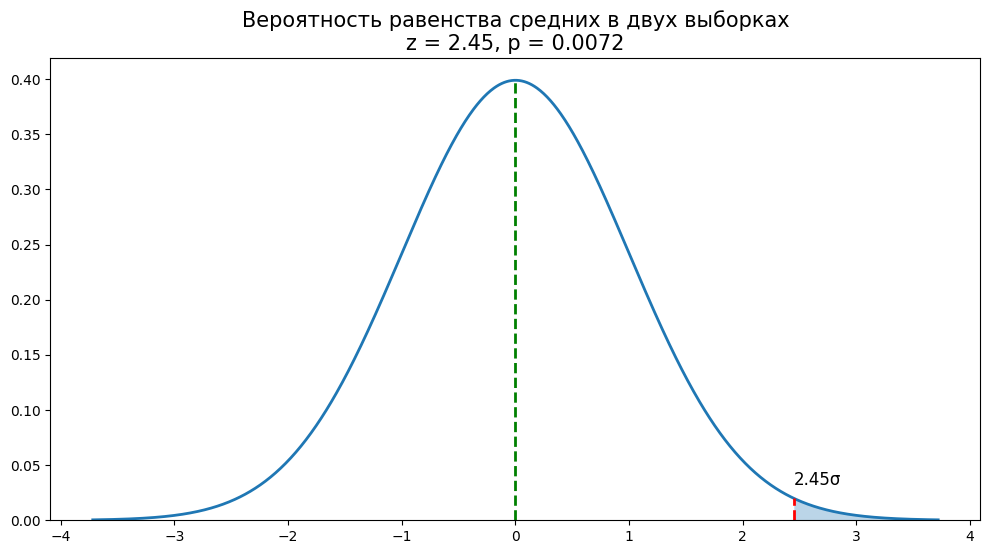

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 1000)

z = (530 - 500) / np.sqrt(150 ** 2 / 300 + 150 ** 2 / 300)
norm_rv = stats.norm(loc=0, scale=1)
ax.plot(x, norm_rv.pdf(x), lw=2)
ax.vlines(0, 0, norm_rv.pdf(0), color='g', lw=2, linestyles="dashed")
ax.vlines(z, 0, norm_rv.pdf(z), color='r', lw=2, linestyles="dashed")
ax.text(z, norm_rv.pdf(z - 0.2), '{:.2f}σ'.format(z), size=12, ha='left')
ax.fill_between(x, norm_rv.pdf(x), np.zeros(len(x)), alpha=0.3, where=(x > z))
ax.set_title('Вероятность равенства средних в двух выборках\nz = {:.2f}, p = {:.4f}'.format(z, 1 - norm_rv.cdf(z)),
             size=15)
ax.set_ylim(0)

Как мы видим, вероятность того, что средние равны - 0.72%. Следовательно, мы можем с уверенностью в 99.3% отвергнуть нулевую гипотезу и сделать вывод, что новая наживка все же лучше, чем старая.

## Когда можно использовать z-критерий?
Естественно, эти формулы можно использовать далеко не всегда. Иногда может потребоваться t-критерий Стьюдента, а иногда даже им не обойтись. Важно помнить, что для успешной реализации этого критерий необходимо соблюсти несколько условий:
- Распределение должно быть нормальным.
- Известна дисперсия генеральной совокупности для всех выборок.
- Выборка имеет размерность более 30 элементов.

Если 2 и 3 условия не удовлетворяют требованиям, то лучше использовать t-критерием Стьюдента.

## P-value
Давайте дополнительно чуть подробнее разберемся как определять $p-value$. Мы рассмотрели только один вариант, когда мы заранее знаем, что $\mu_2$ точно больше, чем $\mu_1$. А если наоборот? Или вообще нет информации о том, как средние расположены относительно друг друга? Именно для таких случаев существует несколько видов гипотез.
- Левосторонняя гипотеза.
- Двусторонняя гипотеза.
- Правосторонняя гипотеза.

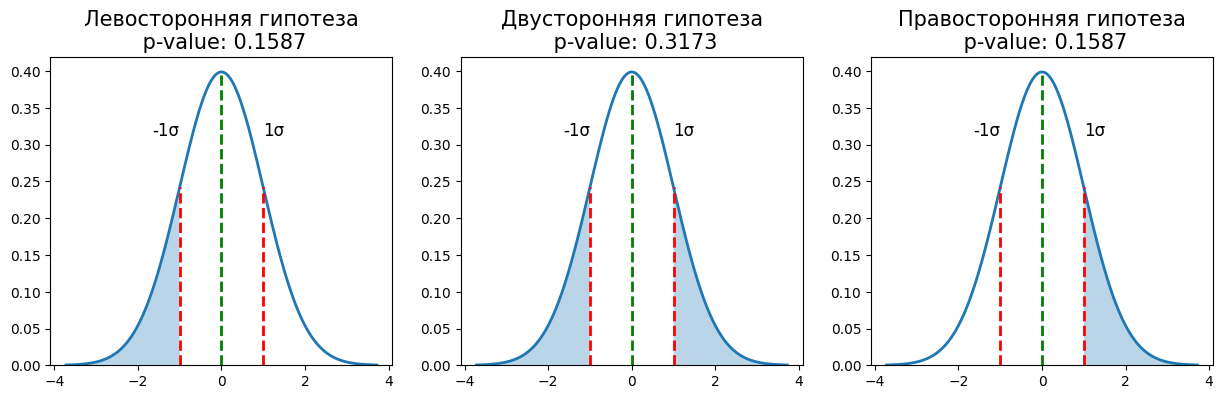

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))
x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 1000)
norm_rv = stats.norm(loc=0, scale=1)

fish = [4, 100, 300]
text = ['Левосторонняя гипотеза', 'Двусторонняя гипотеза', 'Правосторонняя гипотеза']
z = 1
coef = [1, 2, 1]

for i in range(3):
    ax[i].plot(x, norm_rv.pdf(x), lw = 2)
    ax[i].vlines(0, 0, norm_rv.pdf(0), color='g', lw=2, linestyles="dashed")
    ax[i].vlines([-z, z], 0, norm_rv.pdf(z), color='r', lw=2, linestyles="dashed")
    ax[i].text(z, norm_rv.pdf(z - 0.3), '{:.0f}σ'.format(z), size=12, ha='left')
    ax[i].text(-z, norm_rv.pdf(z - 0.3), '-{:.0f}σ'.format(z), size=12, ha='right')
    if (i == 0):
        ax[i].fill_between(x, norm_rv.pdf(x), np.zeros(len(x)), alpha=0.3, where = (x < -z))
    elif (i == 1):
        ax[i].fill_between(x, norm_rv.pdf(x), np.zeros(len(x)), alpha=0.3, where = (x < -z) | (x > z))
    else:
        ax[i].fill_between(x, norm_rv.pdf(x), np.zeros(len(x)), alpha=0.3, where = (x > z))
    ax[i].set_title('{:s}\n p-value: {:.4f}'.format(text[i], (1-norm_rv.cdf(z)) * coef[i]), size=15)
    ax[i].set_ylim(0)

Отличия в них идеологические. Если мы заранее не знаем улучшится в тесте результат или ухудшится (не знаем знак __z-score__), то необходимо применять двустороннюю гипотезу и умножать полученный __p-value__ на 2. А если мы тестируем улучшение или ухудшение, то тут достаточно односторонней гипотезы. Правда, уже после получения результатов теста, нельзя менять знак, который выбрали заранее.